<a href="https://colab.research.google.com/github/KeitaTakami/WeeklyReport/blob/master/0508/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dlt

In [0]:
random_AB=0
learningrate=0.0001
batch_s=32
change_num=1
epoch=50
repetition=10

In [9]:
#dlt=Deep Learning Tools

# parameter
random_AB=0
learningrate=0.0001
batch_s=32
change_num=1
epoch=50
repetition=10


import dlt
data=dlt.cifar.load_cifar10()
from keras.utils.np_utils import to_categorical
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
#データの取得,確認
x=data.train_images[:10000]
x=x.astype('float32')/255.0
print(x.shape)
y=data.train_labels[:10000]
y=to_categorical(y,10)
print(y.shape)
#print(x[0])
#print(y[0])
#AとBに二分割
x_a,x_b=train_test_split(x,test_size=0.5,random_state=random_AB)
print(x_a.shape)
print(x_b.shape)
y_a,y_b=train_test_split(y,test_size=0.5,random_state=random_AB)
print(y_a.shape)
print(y_b.shape)

(10000, 32, 32, 3)
(10000, 10)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 10)
(5000, 10)


In [0]:
"""
#モデルの構築

model_AtoB=Sequential()

# 1層目
model_AtoB.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model_AtoB.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model_AtoB.add(MaxPooling2D(pool_size=(2,2)))
model_AtoB.add(Dropout(0.25))

# 2層目
model_AtoB.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model_AtoB.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model_AtoB.add(MaxPooling2D(pool_size=(2,2)))
model_AtoB.add(Dropout(0.25))

# 出力層
model_AtoB.add(Flatten())
model_AtoB.add(Dense(512))
model_AtoB.add(Activation('relu'))
model_AtoB.add(Dropout(0.5))
model_AtoB.add(Dense(10))
model_AtoB.add(Activation('softmax'))

#モデルの構築
model_BtoA=Sequential()

# 1層目
model_BtoA.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model_BtoA.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model_BtoA.add(MaxPooling2D(pool_size=(2,2)))
model_BtoA.add(Dropout(0.25))

# 2層目
model_BtoA.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model_BtoA.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model_BtoA.add(MaxPooling2D(pool_size=(2,2)))
model_BtoA.add(Dropout(0.25))

# 出力層
model_BtoA.add(Flatten())
model_BtoA.add(Dense(512))
model_BtoA.add(Activation('relu'))
model_BtoA.add(Dropout(0.5))
model_BtoA.add(Dense(10))
model_BtoA.add(Activation('softmax'))


"""
#モデルの構築
def model():
  model=Sequential()

  # 1層目
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # 2層目
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # 出力層
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  return model

In [0]:

#A->train,B->test
model_AtoB=model()
model_BtoA=model()
model_AtoB.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=learningrate),
    metrics=['accuracy'])

#B->train,A->test
model_BtoA.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=learningrate),
    metrics=['accuracy'])

In [12]:
AtoB_train_loss=[]
AtoB_train_acc=[]
AtoB_test_loss=[]
AtoB_test_acc=[]
BtoA_train_loss=[]
BtoA_train_acc=[]
BtoA_test_loss=[]
BtoA_test_acc=[]
for i in range(repetition):
  print('%d回目' % i)
  #A->train,B->test
  model_AtoB.fit(x_a,y_a,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  AtoB_train_loss.append(model_AtoB.evaluate(x_a,y_a)[0])
  AtoB_train_acc.append(model_AtoB.evaluate(x_a,y_a)[1])
  AtoB_test_loss.append(model_AtoB.evaluate(x_b,y_b)[0])
  AtoB_test_acc.append(model_AtoB.evaluate(x_b,y_b)[1])
  y_b_pred=model_AtoB.predict_classes(x_b)
  y_b_true=np.argmax(y_b,axis=1)
  # Bの正解
  B_correct=[]
  for j in range(5000):
    if y_b_pred[j] == y_b_true[j]:
      B_correct.append(j)
  

  #B->train,A->test
  model_BtoA.fit(x_b,y_b,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  BtoA_train_loss.append(model_BtoA.evaluate(x_b,y_b)[0])
  BtoA_train_acc.append(model_BtoA.evaluate(x_b,y_b)[1])
  BtoA_test_loss.append(model_BtoA.evaluate(x_a,y_a)[0])
  BtoA_test_acc.append(model_BtoA.evaluate(x_a,y_a)[1])
  y_a_pred=model_BtoA.predict_classes(x_a)
  y_a_true=np.argmax(y_a,axis=1)
  # Aの間違い
  A_miss=[]
  x_a_miss=[]
  y_a_miss=[]
  for j in range(5000):
    if y_a_pred[j] != y_a_true[j]:
      A_miss.append(j)
  
  random.shuffle(A_miss)
  random.shuffle(B_correct)
  
  if change_num > 0:
    if len(A_miss) <= len(B_correct):
      change_max=len(A_miss)
    else:
      change_max=len(B_correct)
    
    if change_max > change_num:
      change_max = change_num

    for j in range(change_max):
      x_a[A_miss[j]],x_b[B_correct[j]]=x_b[B_correct[j]],x_a[A_miss[j]]
      y_a[A_miss[j]],y_b[B_correct[j]]=y_b[B_correct[j]],y_a[A_miss[j]]
    
    model_AtoB=model()
    model_BtoA=model()
    model_AtoB.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])


    model_BtoA.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])

with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/ABtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(AtoB_test_acc))
with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/ABtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(AtoB_train_acc))
with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/BAtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(BtoA_test_acc))
with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/BAtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(BtoA_train_acc))
with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/ABtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(AtoB_test_loss))
with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/ABtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(AtoB_train_loss))
with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/BAtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(BtoA_test_loss))
with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/BAtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(BtoA_train_loss))


#モデルの保存
import numpy as np
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense
from keras.optimizers import RMSprop
import os
SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/model/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_"
# モデル構造の保存
open(SAVE_DATA_DIR_PATH  + "model_AtoB.json","w").write(model_AtoB.to_json())

# 学習済みの重みを保存
model_AtoB.save_weights(SAVE_DATA_DIR_PATH + "AtoB_weight.hdf5")

# モデル構造の保存
open(SAVE_DATA_DIR_PATH  + "model_BtoA.json","w").write(model_BtoA.to_json())

# 学習済みの重みを保存
model_BtoA.save_weights(SAVE_DATA_DIR_PATH + "BtoA_weight.hdf5")

0回目
Train on 4500 samples, validate on 500 samples
Epoch 1/50
4500/4500 [==============================] - 16s 4ms/step - loss: 2.2830 - accuracy: 0.1320 - val_loss: 2.1971 - val_accuracy: 0.2280
Epoch 2/50
4500/4500 [==============================] - 16s 4ms/step - loss: 2.1008 - accuracy: 0.2209 - val_loss: 2.0181 - val_accuracy: 0.2660
Epoch 3/50
4500/4500 [==============================] - 16s 4ms/step - loss: 2.0006 - accuracy: 0.2624 - val_loss: 1.9399 - val_accuracy: 0.2880
Epoch 4/50
4500/4500 [==============================] - 16s 4ms/step - loss: 1.9021 - accuracy: 0.3107 - val_loss: 1.8689 - val_accuracy: 0.3260
Epoch 5/50
4500/4500 [==============================] - 16s 4ms/step - loss: 1.8163 - accuracy: 0.3340 - val_loss: 1.7995 - val_accuracy: 0.3580
Epoch 6/50
4500/4500 [==============================] - 16s 4ms/step - loss: 1.7504 - accuracy: 0.3642 - val_loss: 1.7665 - val_accuracy: 0.3540
Epoch 7/50
4500/4500 [==============================] - 16s 4ms/step - loss: 1.

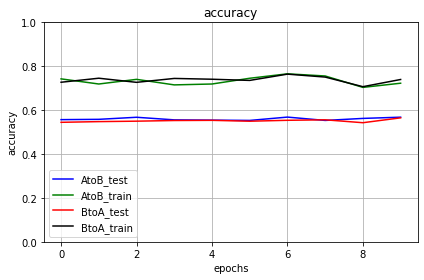

In [3]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()

y1=[]
y2=[]
y3=[]
y4=[]

with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/ABtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y1.append(line)

y1=np.ravel(y1)

with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/ABtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y2.append(line)

y2=np.ravel(y2)

with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/BAtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y3.append(line)

y3=np.ravel(y3)

with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/BAtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y4.append(line)

y4=np.ravel(y4)

c1,c2,c3,c4 = "blue","green","red","black"   # 各プロットの色
l1,l2,l3,l4 = "AtoB_test","AtoB_train","BtoA_test","BtoA_train"   # 各ラベル

  # x軸ラベル
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title('accuracy') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([0, 5]) # x方向の描画範囲を指定
ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(y1, color=c1, label=l1)
ax.plot(y2, color=c2, label=l2)
ax.plot(y3, color=c3, label=l3)
ax.plot(y4, color=c4, label=l4)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig(f"/content/drive/My Drive/googlecolab/cifar10/acc/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.png") # 画像の保存
plt.show()

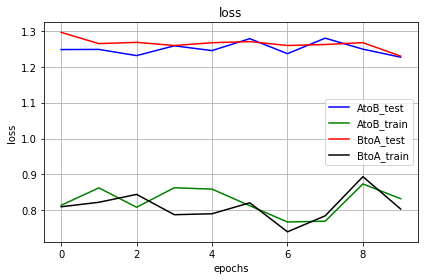

In [4]:
fig, ax = plt.subplots()

y1=[]
y2=[]
y3=[]
y4=[]

with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/ABtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y1.append(line)

y1=np.ravel(y1)

with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/ABtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y2.append(line)

y2=np.ravel(y2)

with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/BAtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y3.append(line)

y3=np.ravel(y3)

with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/BAtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y4.append(line)

y4=np.ravel(y4)

c1,c2,c3,c4 = "blue","green","red","black"   # 各プロットの色
l1,l2,l3,l4 = "AtoB_test","AtoB_train","BtoA_test","BtoA_train"   # 各ラベル

  # x軸ラベル
ax.set_xlabel('epochs')
ax.set_ylabel('loss')  # y軸ラベル
ax.set_title('loss') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([0, 5]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(y1, color=c1, label=l1)
ax.plot(y2, color=c2, label=l2)
ax.plot(y3, color=c3, label=l3)
ax.plot(y4, color=c4, label=l4)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig(f"/content/drive/My Drive/googlecolab/cifar10/loss/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.png") # 画像の保存
plt.show()

In [0]:
#モデルの保存
import numpy as np
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense
from keras.optimizers import RMSprop
import os
SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/model/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_"
# モデル構造の保存
open(SAVE_DATA_DIR_PATH  + "model_AtoB.json","w").write(model_AtoB.to_json())

# 学習済みの重みを保存
model_AtoB.save_weights(SAVE_DATA_DIR_PATH + "AtoB_weight.hdf5")

# モデル構造の保存
open(SAVE_DATA_DIR_PATH  + "model_BtoA.json","w").write(model_BtoA.to_json())

# 学習済みの重みを保存
model_BtoA.save_weights(SAVE_DATA_DIR_PATH + "BtoA_weight.hdf5")

In [0]:
# 保存したモデル構造の読み込み
model3 = model_from_json(open(SAVE_DATA_DIR_PATH + "model_AtoB.json", 'r').read())

# 保存した学習済みの重みを読み込み
model3.load_weights(SAVE_DATA_DIR_PATH + "AtoB_weight.hdf5")

# 保存したモデル構造の読み込み
model4 = model_from_json(open(SAVE_DATA_DIR_PATH + "model_BtoA.json", 'r').read())

# 保存した学習済みの重みを読み込み
model4.load_weights(SAVE_DATA_DIR_PATH + "BtoA_weight.hdf5")

In [0]:
model3.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=learningrate),
    metrics=['accuracy'])

model4.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=learningrate),
    metrics=['accuracy'])

In [49]:
xx3=model3.evaluate(xx,yy)[1]
print(xx3)
xx4=model4.evaluate(xx,yy)[1]
print(xx4)

40000/40000 [==============================] - 35s 873us/step
0.4955250024795532
40000/40000 [==============================] - 35s 863us/step
0.5731499791145325


In [0]:
with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/ABtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(AtoB_test_acc))
with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/ABtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(AtoB_train_acc))
with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/BAtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(BtoA_test_acc))
with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/BAtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(BtoA_train_acc))
with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/ABtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(AtoB_test_loss))
with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/ABtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(AtoB_train_loss))
with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/BAtest_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(BtoA_test_loss))
with open(f"/content/drive/My Drive/googlecolab/cifar10/loss/BAtrain_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text", "w")as f:
  f.writelines(str(BtoA_train_loss))

In [34]:
#精度を確かめる
xx=data.train_images[10000:]
xx=xx.astype('float32')/255.0
print(xx.shape)
yy=data.train_labels[10000:]
yy=to_categorical(yy,10)
print(yy.shape)

(40000, 32, 32, 3)
(40000, 10)


In [62]:
xx1=model_AtoB.evaluate(xx,yy)[1]
xx2=model_BtoA.evaluate(xx,yy)[1]
xx3=model_AtoB.evaluate(xx,yy)[0]
xx4=model_BtoA.evaluate(xx,yy)[0]
print(xx1)
print(xx2)
print(xx3)
print(xx4)

40000/40000 [==============================] - 35s 867us/step
0.5116999745368958
0.564424991607666
5.5970186433792115
2.356930879545212


In [0]:
with open(f"/content/drive/My Drive/googlecolab/cifar10/acc/xx40000_random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}.text","w") as f:
  f.writelines(str(xx1))